# outside_in analysis 

In [2]:
base = "generated_tracks/triplet_level/inside_out/"


for eno in tqdm(range(90)):
    pt_arr = []
    pt_label = []
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)



    class_name = base + f'event_{eno}.pkl'

    with open(class_name,'rb') as f:
        track_class = pickle.load(f)


10801.255555555555 243.57777777777778


In [19]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from utils.track_reconstruction_metric_triplet_level  import*
from utils.track_reconstruction_metric_hit_level  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm

import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*
class generated_tracks:
    pass

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:
    pdg_dict = pickle.load(f)
with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)
barrel_data = get_barrel_data(config)
config['sigma_cut'] = 3
layer_files = ['z0','dtheta','dkappa']
get_layer_wise_data(layer_files,config)
def fname(eno):


    triplet_arr_fname  = f'generated_tracks/triplets/chi2_7_triplet_arr{eno}.pkl'
    triplet_df_fname  = f'generated_tracks/triplets/chi2_7_triplet_df{eno}.pkl'
    ca_fname = f'generated_tracks/ca_class_eno_{eno}.pkl'
    # triplet_fname = stage_dir+f'{track_segments}_eventno_'+str(eno)+'_signal_'+str(signal)+'_z0_'+str(z0)+'_pt_'+str(pt)+'.pkl'
    return triplet_arr_fname,triplet_df_fname,ca_fname


def load_triplets(eno):
    triplet_arr_fname,triplet_df_fname,_ = fname(eno)
    with open(triplet_arr_fname,'rb') as f:
        triplet_arr = pickle.load(f)
    with open(triplet_df_fname,'rb') as f:
        triplet_df = pickle.load(f)
    config['chi_square_cut'] = 6
    return triplet_array_after_chi2_cut(triplet_arr,triplet_df,config)    



def load_ca(eno):
    _,_,ca_fname = fname(eno)
    with open(ca_fname,'rb') as f:
        ca = pickle.load(f)
    return ca



In [33]:
pt_truth = []
pt_false = []


for eno in tqdm(range(90)):
    ca = load_ca(eno)

    for iter in range (len(ca.label)):
        if ca.label[iter] == True:
            pt_truth.append(ca.momentum_array[iter])
        else:
            pt_false.append(ca.momentum_array[iter])

100%|██████████| 90/90 [00:04<00:00, 18.33it/s]


In [35]:
pt_false

[1.0036348514277138,
 1.0036155502839803,
 1.0038694222005564,
 1.003850361037365,
 0.9618558500655856,
 0.9618648870080546,
 0.9618374468305381,
 0.9618462921256327,
 0.9540326568450844,
 0.9540372284371809,
 0.9540879133659527,
 0.9540923499979894,
 1.2756196467256804,
 1.4925624660132042,
 1.4922531605821951,
 1.4926028578316555,
 1.4922934799706429,
 1.4930208912274459,
 1.4927120674636454,
 1.4930945188692404,
 1.4927857835174592,
 1.0552612117593156,
 1.3068433409533144,
 6.341242035944228,
 6.349087255168618,
 6.319996571133811,
 6.32777137870866,
 5.567841053158304,
 5.573987948092713,
 5.551791863717582,
 5.557888901733062,
 0.9733792270602557,
 0.9734431624645115,
 0.8930262913382515,
 0.8928942321601424,
 1.7043071115413624,
 1.704355988777659,
 1.7046802979470168,
 1.7047290404091344,
 1.3357925536682385,
 1.3360893351586178,
 1.3357929679600813,
 1.3360535446271944,
 1.0113082232793915,
 1.011567176099603,
 1.0075632530231289,
 1.0078344496818212,
 1.011246251890619,
 1.01

In [2]:
base = "generated_tracks/triplet_level/inside_out/"
chi2_truth = []
chi2_false = []

for eno in tqdm(range(90)):
    pt_arr = []
    pt_label = []
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)



    class_name = base + f'event_{eno}.pkl'

    with open(class_name,'rb') as f:
        track_class = pickle.load(f)
    assert False

    track_after_first_trimming = track_class.track_after_first_trimming
    chi2_global_after_first_trimming = track_class.chi2_after_first_trimming 
    label_after_first_trimming = track_class.label_after_first_trimming    

    track_after_second_trimming,chi2_global_after_second_trimming,label_after_second_trimming =  disconnecting_the_graph(track_after_first_trimming,np.array(chi2_global_after_first_trimming),label_after_first_trimming,0)

    for iter in range(len(label_after_second_trimming)):
        if label_after_second_trimming[iter] == 1:
            chi2_truth.append(chi2_global_after_second_trimming[iter])
        else:
            chi2_false.append(chi2_global_after_second_trimming[iter])




  0%|          | 0/90 [00:00<?, ?it/s]


AssertionError: 

In [4]:
ca_class = load_ca(eno)
dir(ca_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'c3d_gttf_array',
 'ca_metric',
 'chi2_gttf_array',
 'collect_tracks',
 'get_track_graph',
 'grid',
 'index_dict',
 'label',
 'make_nodesplit_dict',
 'momentum_array',
 'pt',
 'sigma_k_array',
 'sigma_p_array',
 'start_evolution',
 'theta_array',
 'track_builder',
 'track_collection',
 'valid_neighbors']

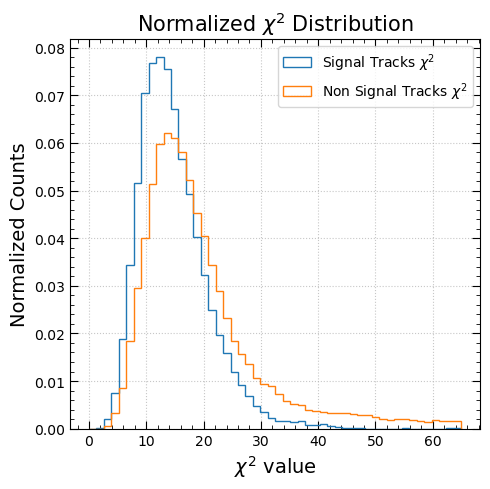

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.hist(chi2_truth, bins=50, range=(0,65), density=True, histtype='step', label=r'Signal Tracks $\chi^2$')
plt.hist(chi2_false, bins=50, range=(0, 65), density=True, histtype='step', label=r'Non Signal Tracks $\chi^2$')

plt.legend()
plt.xlabel(r'$\chi^2$ value',fontsize=14)
plt.ylabel(r'Normalized Counts',fontsize=14)
plt.title(r'Normalized $\chi^2$ Distribution',fontsize = 15)

# Set x-axis to start from 0
# plt.xlim(0, 20)

# Add minor ticks
plt.minorticks_on()

# Adjust tick parameters for better visibility
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Add grid for better readability
plt.grid(which='major', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.savefig('thesis_plots/chi2_after_all.png', dpi=300)
plt.show()

# $\chi^2$ after all

In [13]:
base = "generated_tracks/triplet_level/inside_out/"


for eno in tqdm(range(90)):
    pt_arr = []
    pt_label = []
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)



    class_name = base + f'event_{eno}.pkl'

    with open(class_name,'rb') as f:
        track_class = pickle.load(f)


    track_collection = track_class.track_after_second_trimming
    triplet_arr_chi2,triplet_df_chi2 = load_triplets(eno)

    signal_pids = signal_df.particle_id.unique()
    for track in track_collection:
        triplet_object_array = []
        hits = []
        for iter,element in enumerate(track):
            iter  = 7-iter
            index_layer = np.where(triplet_df_chi2 == iter)[0]

            triplet_element = triplet_arr_chi2[index_layer][element]

            triplet_object_array.append(triplet_element)
            hits.extend(triplet_element.hitids)
        hits = np.unique(hits)
        hits = np.flip(hits)

        triplet_object_array.reverse()
        pid_ = hits_df[hits_df.hit_id.isin(hits)]['particle_id'].values  ##finsding particle id for all hits in a track
        unique, counts = np.unique(pid_, return_counts=True)
        

        
        df = hits_df[hits_df.hit_id.isin(hits[0:2])]
        z1 = df['z'].values[0]
        z2 = df['z'].values[1]
        r1 = df['r'].values[0]
        r2 = df['r'].values[1]
        dr = r2-r1
        dz = z2-z1
        theta  = np.arctan2(dr,dz)


        
        gttf_class = GTTF(triplet_object_array)
        
        
        curvature= gttf_class.C3D_glob

        momentum = (0.3/1000)*2/np.abs(curvature)

        pt = np.abs(momentum*np.sin(theta))

        pt_arr.append(pt)
    
        if(np.max(counts)==10):  ##criterion for 100% matching 
            if pid_[0] in signal_pids:
                pt_label.append(True)
            else:
                pt_label.append(False)   
        else:
            pt_label.append(False)
        
    pt_arr = np.array(pt_arr)
    pt_label = np.array(pt_label)

    track_class.pt_arr = pt_arr
    track_class.pt_label = pt_label

    with open(class_name,'wb') as f:
        pickle.dump(track_class,f)



100%|██████████| 90/90 [08:40<00:00,  5.78s/it]


In [12]:
pt_reconstructed  = []
pt_false  = []
base = "generated_tracks/triplet_level/inside_out/"
for eno in range(90):
    # for eno in tqdm(range(90)):

    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)



    class_name = base + f'event_{eno}.pkl'

    with open(class_name,'rb') as f:
        track_class = pickle.load(f)

    pt_arr = track_class.pt_arr

    ##select values greter than equal to 1
    pt_arr = pt_arr[pt_arr>=1]
    pt_reconstructed.extend(pt_arr)

      


In [6]:
pt_all = pt_truth+pt_false

pt_all_name = 'em_plots/pt_all_gttf.pkl'
pt_truth_name = 'em_plots/pt_truth_gttf.pkl'

with open(pt_all_name,'wb') as f:
    pickle.dump(pt_all,f)
with open(pt_truth_name,'wb') as f:
    pickle.dump(pt_truth,f)

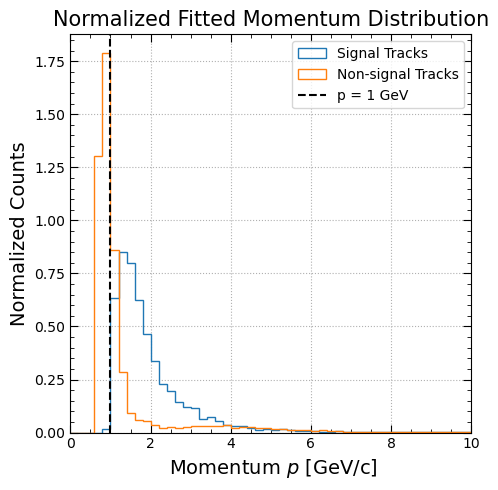

In [39]:

plt.figure(figsize=(5, 5))

plt.hist(pt_truth, bins=50, range=(0, 10),density = True, histtype='step',label='Signal Tracks')
plt.hist(pt_false, bins=50, range=(0, 10), density  = True,histtype='step', label='Non-signal Tracks')

# Vertical line at p = 1 GeV
plt.axvline(x=1, color='k', linestyle='--', label=r'p = 1 GeV')
##add dashed line as legend one gev



plt.legend()
plt.xlabel(r' Momentum $p$ [GeV/c]',fontsize = 14)
plt.ylabel('Normalized Counts',fontsize = 14)
plt.title('Normalized Fitted Momentum Distribution',fontsize = 15)
# plt.ylim(0,4000)
# Set x-axis to start from 0
plt.xlim(0, 10)

# Add minor ticks
plt.minorticks_on()

# Adjust tick parameters for better visibility
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Add grid for better readability
plt.grid(which='major', linestyle=':', alpha=1)

plt.tight_layout()
plt.savefig('thesis_plots/pt_fitted.png', dpi=300)
plt.show()

In [79]:
pt_trackml = []

for eno in tqdm(range(90)):
    hdf,pdf = read_files(eno)
    signal_df = get_signal(hdf,pdf,config)


    pids = signal_df.particle_id.unique()

    pt = pdf[pdf.particle_id.isin(pids)]['pt'].values
    pt_trackml.extend(pt)

100%|██████████| 90/90 [00:53<00:00,  1.68it/s]


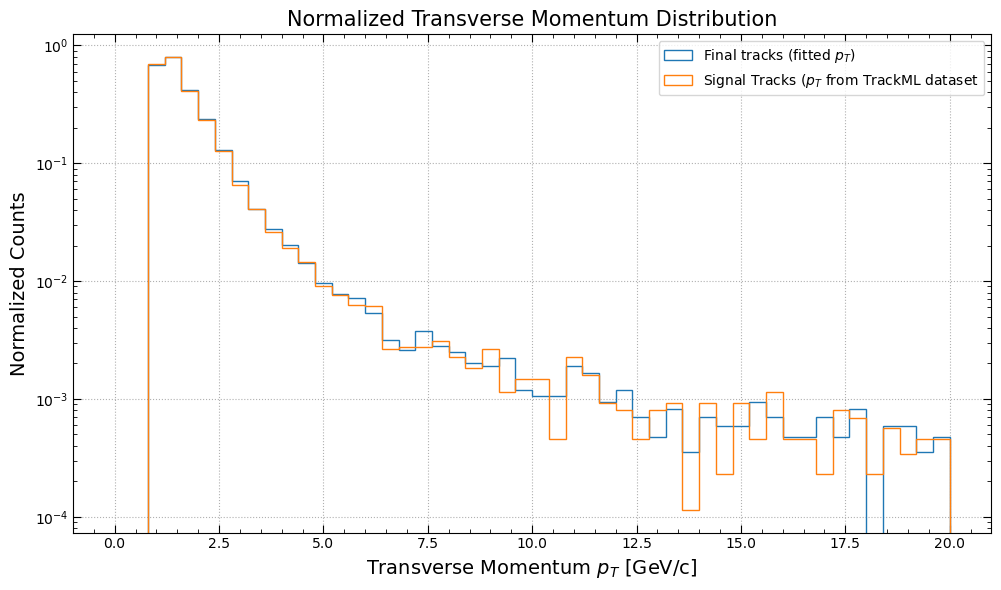

In [102]:

plt.figure(figsize=(10, 6))

plt.hist(pt_reconstructed, bins=50, range=(0, 20),density = True, histtype='step',label=r'Final tracks (fitted $p_T$)')
plt.hist(pt_trackml, bins=50, range=(0, 20), density  = True,histtype='step', label='Signal Tracks ($p_T$ from TrackML dataset')

# Vertical line at p = 1 GeV
# plt.axvline(x=1, color='k', linestyle='--', label=r'p_T = 1 GeV')
##add dashed line as legend one gev



plt.legend()
plt.xlabel(r'Transverse Momentum $p_T$ [GeV/c]',fontsize = 14)
plt.ylabel('Normalized Counts',fontsize = 14)
plt.title('Normalized Transverse Momentum Distribution',fontsize = 15)
# plt.ylim(0,4000)


# Add minor ticks
plt.minorticks_on()

# Adjust tick parameters for better visibility
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Add grid for better readability
plt.grid(which='major', linestyle=':', alpha=1)

plt.tight_layout()
plt.yscale('log')

plt.savefig('thesis_plots/normalized_pt_final.png', dpi=300)
plt.show()

In [14]:
## ROC curve

In [15]:
base = "generated_tracks/triplet_level/inside_out/"

pt_cut_arr  = [0.5,0.6,0.7,0.8,0.9,1.,]

for pt_cut in pt_cut_arr:


    metric_after_ptc2_cut = {'eff':[],'pur':[],'total_tracks':[],'perfect_eff':[]}

    for eno in tqdm(range(90)):



        hdf,pdf = read_files(eno)
        hits_df = load_barrel_df(hdf)
        signal_df = get_signal(hdf,pdf,config)



        class_name = base + f'event_{eno}.pkl'

        with open(class_name,'rb') as f:
            track_class = pickle.load(f)


        track_collection = track_class.track_after_second_trimming
        filtered_triplet_arr,filtered_triplet_df = load_triplets(eno)

        signal_pids = signal_df.particle_id.unique()

        index_after_pt_cut = []

        for i in range(len(track_class.pt_label)):
            reco_pt = track_class.pt_arr[i]
            if reco_pt>=pt_cut:
                index_after_pt_cut.append(i)


        tracks_after_pt_cut = []

        for iter in index_after_pt_cut:
            tracks_after_pt_cut.append(track_collection[iter])



        eff,pur,per_eff,track_collection_hits = track_reco_meric(tracks_after_pt_cut,
                    filtered_triplet_arr,
                    filtered_triplet_df,
                    hits_df,
                    signal_df)

        metric_after_ptc2_cut['eff'].append(eff)
        metric_after_ptc2_cut['pur'].append(pur)
        metric_after_ptc2_cut['total_tracks'].append(len(tracks_after_pt_cut))
        metric_after_ptc2_cut['perfect_eff'].append(per_eff) 

    ##print average at pt of eff,pur,perfect then change line
    eff = np.mean(metric_after_ptc2_cut['eff'])
    pur = np.mean(metric_after_ptc2_cut['pur'])
    total_tracks = np.sum(metric_after_ptc2_cut['total_tracks'])
    perfect_eff = np.mean(metric_after_ptc2_cut['perfect_eff'])

    print(f'pt cut = {pt_cut} eff = {eff} pur = {pur} total_tracks = {total_tracks} perfect_eff = {perfect_eff}','\n')
    metric_name = f'em_plots/metric_after_pt_cut_{pt_cut}.pkl'
    save_dict_as_json(metric_after_ptc2_cut,metric_name)   




    

100%|██████████| 90/90 [06:23<00:00,  4.27s/it]


pt cut = 0.5 eff = 0.9811420137947309 pur = 0.7939064111431441 total_tracks = 27075 perfect_eff = 0.9756345493824199 



100%|██████████| 90/90 [05:58<00:00,  3.99s/it]


pt cut = 0.6 eff = 0.9811420137947309 pur = 0.7939064111431441 total_tracks = 27075 perfect_eff = 0.9756345493824199 



100%|██████████| 90/90 [05:43<00:00,  3.82s/it]


pt cut = 0.7 eff = 0.9811420137947309 pur = 0.7974677878226215 total_tracks = 26954 perfect_eff = 0.9756345493824199 



100%|██████████| 90/90 [05:53<00:00,  3.92s/it]


pt cut = 0.8 eff = 0.9810979220839724 pur = 0.8326399148354166 total_tracks = 25824 perfect_eff = 0.9755904576716615 



100%|██████████| 90/90 [05:37<00:00,  3.75s/it]


pt cut = 0.9 eff = 0.9810589357291966 pur = 0.8992006282474392 total_tracks = 23923 perfect_eff = 0.9755514713168858 



100%|██████████| 90/90 [05:28<00:00,  3.65s/it]

pt cut = 1.0 eff = 0.9626946561056468 pur = 0.9942904758213066 total_tracks = 21232 perfect_eff = 0.9573189667188668 



pt cut = 0.5 eff = 0.9811420137947309 pur = 0.7939064111431441 f1_score = 0.8776492224664731 

pt cut = 0.6 eff = 0.9811420137947309 pur = 0.7939064111431441 f1_score = 0.8776492224664731 

pt cut = 0.7 eff = 0.9811420137947309 pur = 0.7974677878226215 f1_score = 0.8798210271519089 

pt cut = 0.8 eff = 0.9810979220839724 pur = 0.8326399148354166 f1_score = 0.9007931285997755 

pt cut = 0.9 eff = 0.9810589357291966 pur = 0.8992006282474392 f1_score = 0.9383479049985244 

pt cut = 1.0 eff = 0.9626946561056468 pur = 0.9942904758213066 f1_score = 0.978237506329344 



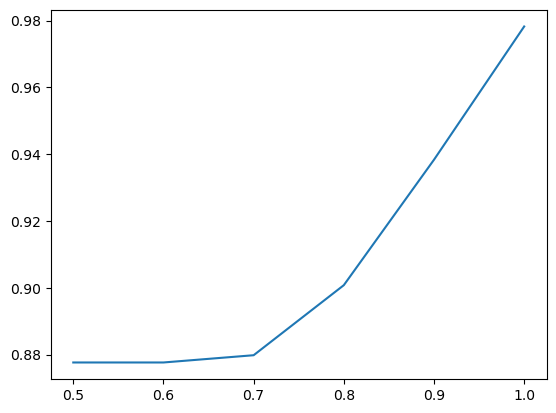

In [19]:
##load metric and calculate F1 score from avg eff and purity

pt_cut_arr  = [0.5,0.6,0.7,0.8,0.9,1.]

f1_score_arr = []

for pt_cut in pt_cut_arr:
    metric_name = f'em_plots/metric_after_pt_cut_{pt_cut}.pkl'
    with open(metric_name,'rb') as f:
        metric = json.load(f)

    eff = np.mean(metric['eff'])
    pur = np.mean(metric['pur'])

    f1_score = 2*(eff*pur)/(eff+pur)
    f1_score_arr.append(f1_score)

    print(f'pt cut = {pt_cut} eff = {eff} pur = {pur} f1_score = {f1_score}','\n')

plt.plot(pt_cut_arr,f1_score_arr)    

In [49]:
print('pt cut = ',pt_cut_arr)
print('eff_arr  = ',eff_arr)
print('pur_arr  = ',pur_arr)
print('perfect_Eff  = ',perfect_eff_arr)
print('perfect_purity',perfect_pur_arr)

pt cut =  [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
eff_arr  =  [0.9811420137947309, 0.9811420137947309, 0.9811420137947309, 0.9810979220839724, 0.9810589357291966, 0.9626946561056468]
pur_arr  =  [0.7939064111431441, 0.7939064111431441, 0.7974677878226215, 0.8326399148354166, 0.8992006282474392, 0.9942904758213066]
perfect_Eff  =  [0.9756345493824199, 0.9756345493824199, 0.9756345493824199, 0.9755904576716615, 0.9755514713168858, 0.9573189667188668]
perfect_purity [0.7894415769638469, 0.7894415769638469, 0.7929822216379283, 0.8279604012285057, 0.8941416038385966, 0.9887362666738827]


pt cut = 0.5 eff = 0.9811420137947309 pur = 0.7939064111431441 

pt cut = 0.6 eff = 0.9811420137947309 pur = 0.7939064111431441 

pt cut = 0.7 eff = 0.9811420137947309 pur = 0.7974677878226215 

pt cut = 0.8 eff = 0.9810979220839724 pur = 0.8326399148354166 

pt cut = 0.9 eff = 0.9810589357291966 pur = 0.8992006282474392 

pt cut = 1.0 eff = 0.9626946561056468 pur = 0.9942904758213066 



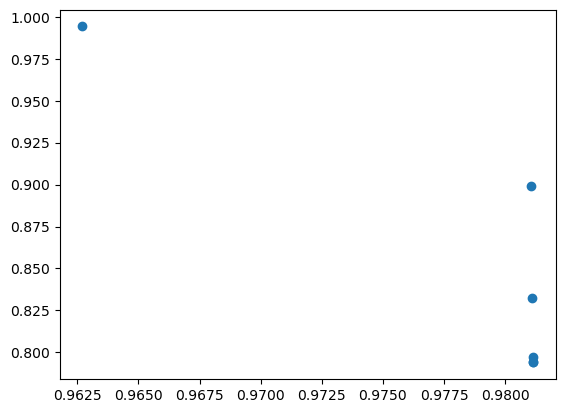

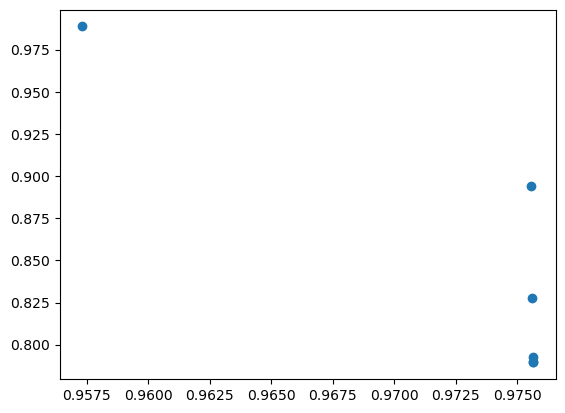

In [30]:
##plot mean eff vs purity

pt_cut_arr  = [0.5,0.6,0.7,0.8,0.9,1.]
eff_arr = []
pur_arr = []
perfect_eff_arr = []
perfect_pur_arr  = []

for pt_cut in pt_cut_arr:
    metric_name = f'em_plots/metric_after_pt_cut_{pt_cut}.pkl'
    with open(metric_name,'rb') as f:
        metric = json.load(f)

    eff = np.mean(metric['eff'])
    pur = np.mean(metric['pur'])

    eff_arr.append(eff)
    pur_arr.append(pur)
    metric   = pd.DataFrame(metric)
    base = "generated_tracks/triplet_level/inside_out/"
    ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

    metric['perfect_pur'] = metric['perfect_eff']*ca_metric_df['signal_tracks']/metric['total_tracks']
    metric.to_csv(f'em_plots/metric_after_pt_cut_{pt_cut}.csv')

    perfect_eff = np.mean(metric['perfect_eff'])
    perfect_pur = np.mean(metric['perfect_pur'])

    perfect_eff_arr.append(perfect_eff)
    perfect_pur_arr.append(perfect_pur)

    print(f'pt cut = {pt_cut} eff = {eff} pur = {pur}','\n')

plt.scatter(eff_arr,pur_arr)
plt.show()
plt.scatter(perfect_eff_arr,perfect_pur_arr)
plt.show()


In [31]:
##perfect_f1_score

perfect_f1_score_arr = []

for i in range(len(perfect_eff_arr)):
    eff = perfect_eff_arr[i]
    pur = perfect_pur_arr[i]
    f1_score = 2*(eff*pur)/(eff+pur)
    perfect_f1_score_arr.append(f1_score)
    

In [32]:
print('pt cut = ',pt_cut_arr)
print('perfect eff  = ',perfect_eff_arr)
print('Perfect purity  = ',perfect_pur_arr)
print('f1_score  = ',perfect_f1_score_arr)
print()

pt cut =  [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
perfect eff  =  [0.9756345493824199, 0.9756345493824199, 0.9756345493824199, 0.9755904576716615, 0.9755514713168858, 0.9573189667188668]
Perfect purity  =  [0.7894415769638469, 0.7894415769638469, 0.7929822216379283, 0.8279604012285057, 0.8941416038385966, 0.9887362666738827]
f1_score  =  [0.8727175737164473, 0.8727175737164473, 0.8748767569694037, 0.895733283907623, 0.9330741700670252, 0.972774014763725]



In [27]:
metric   = pd.DataFrame(metric)
base = "generated_tracks/triplet_level/inside_out/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

metric['perfect_pur'] = metric['perfect_eff']*ca_metric_df['signal_tracks']/ca_metric_df['total_tracks']

eff       pur  total_tracks  perfect_eff
0   0.954386  0.996337           273     0.947368
1   0.965909  0.992218           257     0.962121
2   0.968421  0.989247           279     0.961404
3   0.964824  0.994819           193     0.959799
4   0.955466  0.995781           237     0.943320
..       ...       ...           ...          ...
85  0.982270  0.992832           279     0.975177
86  0.967509  0.996283           269     0.967509
87  0.960289  0.996255           267     0.956679
88  0.974684  0.995690           232     0.970464
89  0.969697  0.988417           259     0.965909

[90 rows x 4 columns]

In [ ]:


ca_metric_df = {'eff':[],'pur':[],'per_eff':[],'total_tracks':[],'signal_tracks':[]}
for eno in tqdm(range(90)):




    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)

    signal_tracks = len(signal_df.particle_id.unique())
    
    ca_class = load_ca(eno)
    eff = ca_class.ca_metric['eff']
    pur = ca_class.ca_metric['pur']
    per_eff = ca_class.ca_metric['per_eff']
    total_tracks = ca_class.ca_metric['total_tracks']
    ca_metric_df['eff'].append(eff)
    ca_metric_df['pur'].append(pur)
    ca_metric_df['per_eff'].append(per_eff)
    ca_metric_df['total_tracks'].append(total_tracks)
    ca_metric_df['signal_tracks'].append(signal_tracks)
    


In [15]:
ca_metric_df = pd.DataFrame(ca_metric_df)
ca_metric_df

eff       pur   per_eff  total_tracks  signal_tracks
0   0.975439  0.053886  0.975439          5159            285
1   0.988636  0.055461  0.988636          4706            264
2   0.982456  0.055446  0.982456          5050            285
3   0.989950  0.053388  0.989950          3690            199
4   0.983806  0.061879  0.983806          3927            247
..       ...       ...       ...           ...            ...
85  0.996454  0.065532  0.996454          4288            282
86  0.985560  0.058508  0.985560          4666            277
87  0.989170  0.055164  0.989170          4967            277
88  0.983122  0.050907  0.983122          4577            237
89  0.988636  0.049743  0.988636          5247            264

[90 rows x 5 columns]

In [2]:

base = "generated_tracks/triplet_level/outside_in/"

# Example usage with your DataFrames
ca_metric_df.to_csv(f'{base}ca_metric.csv')

NameError: name 'ca_metric_df' is not defined

In [50]:
base = "generated_tracks/triplet_level/inside_out/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')
df = ca_metric_df
df['perfect_eff'] = df['per_eff']


base = "generated_tracks/triplet_level/inside_out/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_ptc2_cut_df['signal_tracks'] = ca_metric_df['signal_tracks']
df = df

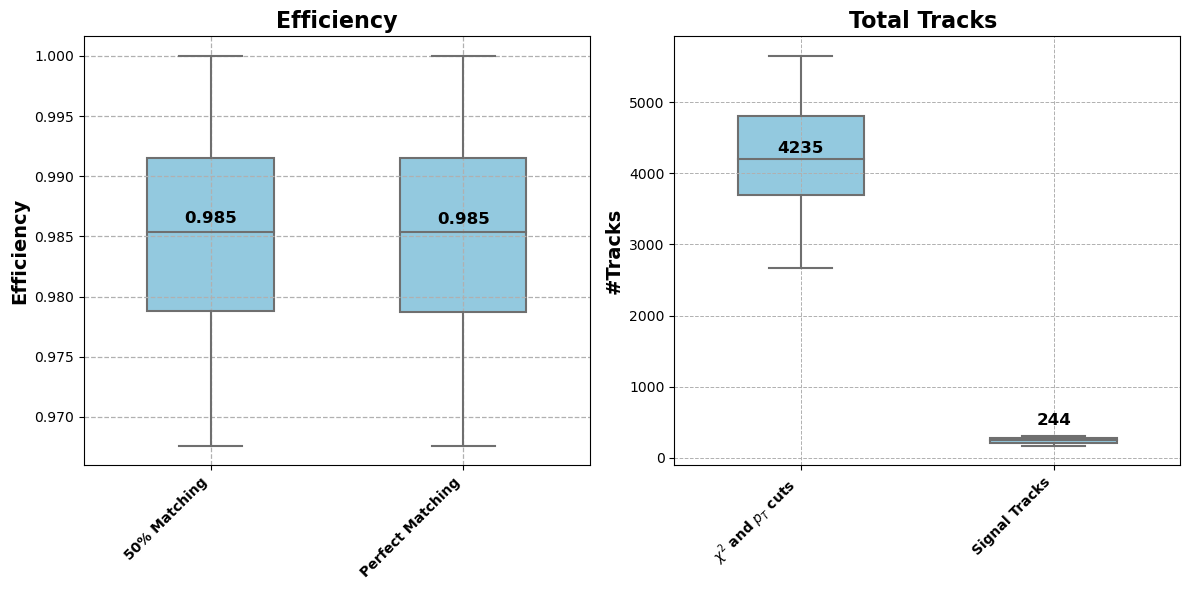

In [51]:

# Data for plotting
eff_data = df[['eff', 'perfect_eff']]
eff_data.columns = ['50% Matching', 'Perfect Matching']
track_data = df[['total_tracks', 'signal_tracks']]
track_data.columns = ['Total Tracks', 'Signal Tracks']

# Set up a larger figure size for high-quality output in the thesis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

# Efficiency Plot
sns.boxplot(data=eff_data, ax=axes[0], showfliers=False, width=0.5, color='skyblue')
means_eff = eff_data.mean()
for j, mean in enumerate(means_eff):
    axes[0].text(j, mean + 0.001, f'{mean:.3f}', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    # axes[0].plot(j, mean, marker='*', color='orange', markersize=10)

axes[0].set_title('Efficiency', fontsize=16, weight='bold')
axes[0].set_ylabel('Efficiency', fontsize=14,fontweight='bold')
axes[0].set_xticklabels(['50% Matching', 'Perfect Matching'], rotation=45, ha='right',fontweight='bold')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.9)

# Track Count Plot
sns.boxplot(data=track_data, ax=axes[1], showfliers=False, width=0.5, color='skyblue')
means_tracks = track_data.mean()
for j, mean in enumerate(means_tracks):
    if j ==0:

        axes[1].text(j, mean + 7, f'{mean:.0f}', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    # axes[1].plot(j, mean, marker='*', color='orange', markersize=10)
    else:
        axes[1].text(j, mean + 170, f'{mean:.0f}', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')


axes[1].set_title('Total Tracks ', fontsize=16, weight='bold')
axes[1].set_ylabel('#Tracks', fontsize=14, fontweight='bold')
axes[1].set_xticklabels([r'$\chi^2$ and $p_T$ cuts', 'Signal Tracks'], rotation=45, ha='right', fontweight='bold')
axes[1].grid(True, which='both', linestyle='--', linewidth=.7)

# Adjust the layout for no overlap
plt.tight_layout()

# Save the figure for use in the thesis (high-quality)
plt.savefig('ca_metric_after_cuts.png', bbox_inches='tight', dpi=300)  # Save at high DPI for quality

# Show the plot
plt.show()

In [53]:
base = "generated_tracks/triplet_level/inside_out/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_first_trim_df = pd.read_csv(f'{base}metric_after_first_trim.csv')
metric_after_second_trim_df = pd.read_csv(f'{base}metric_after_second_trim.csv')

df1 = ca_metric_df
df1['perfect_eff'] = df1['per_eff']
df2 = metric_after_ptc2_cut_df
df3 = metric_after_first_trim_df

df4 = metric_after_second_trim_df
##pruint all four means of perfect_eff


data =[
    [df3.eff, df4.eff, df1.eff],
    [df3.perfect_eff, df4.perfect_eff, df1.perfect_eff],
    [df3.total_tracks, df4.total_tracks, df1.signal_tracks],
]


In [54]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df1 = ca_metric_df
df1['perfect_eff'] = df1['per_eff']
df2 = metric_after_ptc2_cut_df
df3 = metric_after_first_trim_df
df4 = metric_after_second_trim_df
##pruint all four means of perfect_eff


data =[
    [df3.eff, df4.eff, df1.eff],
    [df3.perfect_eff, df4.perfect_eff, df1.perfect_eff],
    [df3.total_tracks, df4.total_tracks, df1.signal_tracks],
]





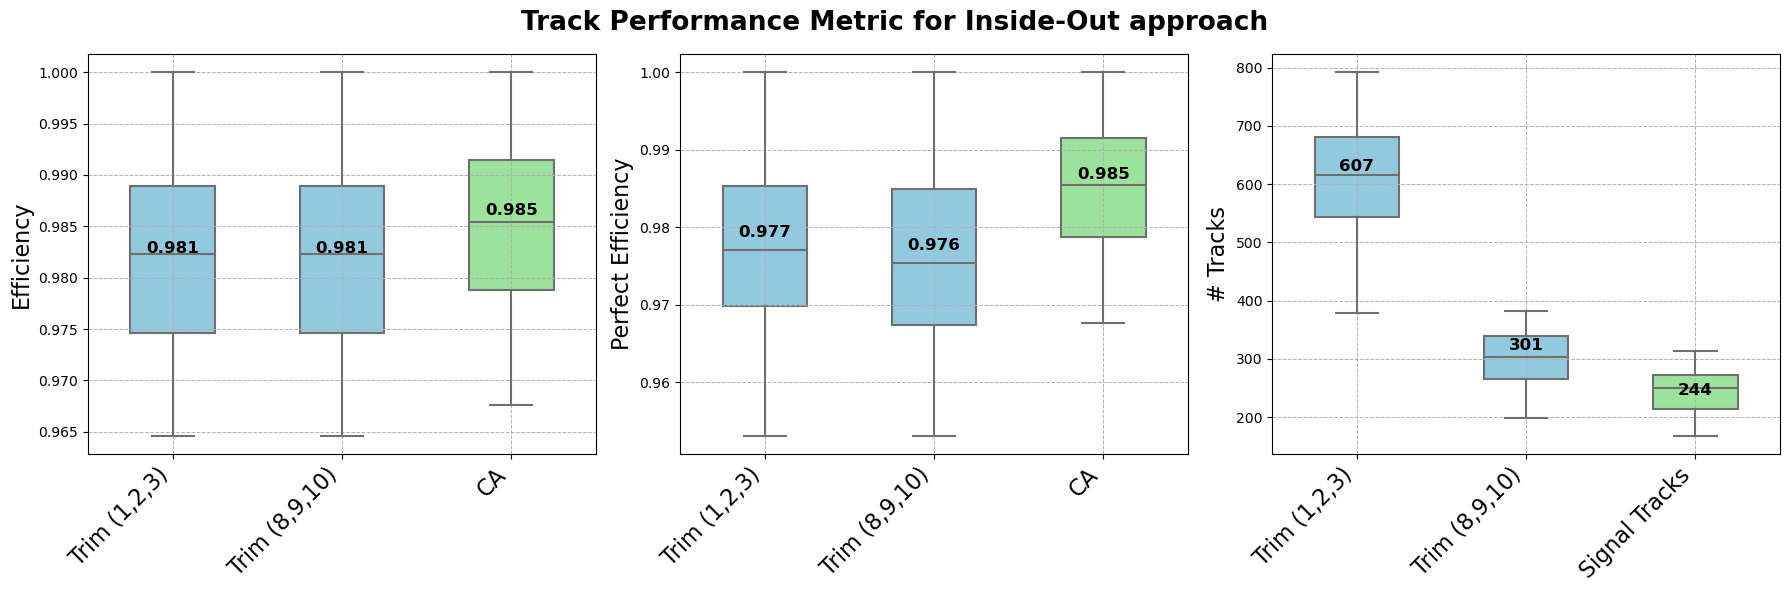

In [56]:

# Set up figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Titles and x-tick labels for each subplot
titles = ['Efficiency', 'Perfect Efficiency', 'Total Tracks']
x_tick_labels = [['Trim (1,2,3)', 'Trim (8,9,10)', 'CA'],
                 ['Trim (1,2,3)', 'Trim (8,9,10)', 'CA'],
                 ['Trim (1,2,3)', 'Trim (8,9,10)', 'Signal Tracks']]

# Colors and y-axis labels for each subplot
y_labels = ['Efficiency', 'Perfect Efficiency', '# Tracks']

# Loop to create each subplot
for i, ax in enumerate(axes):
    # Prepare data as a DataFrame for each subplot
    plot_data = pd.DataFrame(data[i]).T
    plot_data.columns = x_tick_labels[i]
    
    # Box plot for each subplot
    colors = ['skyblue', 'skyblue', 'lightgreen']  # Set last boxplot to green
    sns.boxplot(data=plot_data, ax=ax, showfliers=False, width=0.5, palette=colors)
    
    # Calculate and annotate the means
    means = plot_data.mean()
    for j, mean in enumerate(means):
        offset = 0.001 if i < 2 else (10 if j in [0,1] else -10)  # Customize offset for each plot
        ax.text(j, mean + offset, f'{mean:.3f}' if i < 2 else f'{mean:.0f}',
                color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Set titles, labels, and x-tick labels
    # ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(y_labels[i], fontsize=16)
    ax.set_xticklabels(x_tick_labels[i], rotation=45, ha='right', fontsize = 16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adjust layout to prevent overlap
plt.suptitle('Track Performance Metric for Inside-Out approach',fontsize = 19,fontweight = 'bold')
plt.tight_layout()

# Save the figure at high DPI for quality
plt.savefig('ca_metric_insideout_trims.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [57]:
base = "generated_tracks/triplet_level/outside_in/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

df1 = ca_metric_df
df1['perfect_eff'] = df1['per_eff']

metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_first_trim_df = pd.read_csv(f'{base}metric_after_first_trim.csv')
metric_after_second_trim_df = pd.read_csv(f'{base}metric_after_second_trim.csv')

df1 = ca_metric_df
df1['perfect_eff'] = df1['per_eff']
df2 = metric_after_ptc2_cut_df
df3 = metric_after_first_trim_df
df4 = metric_after_second_trim_df
##pruint all four means of perfect_eff


data =[
    [df3.eff, df4.eff, df1.eff],
    [df3.perfect_eff, df4.perfect_eff, df1.perfect_eff],
    [df3.total_tracks, df4.total_tracks, df1.signal_tracks],
]


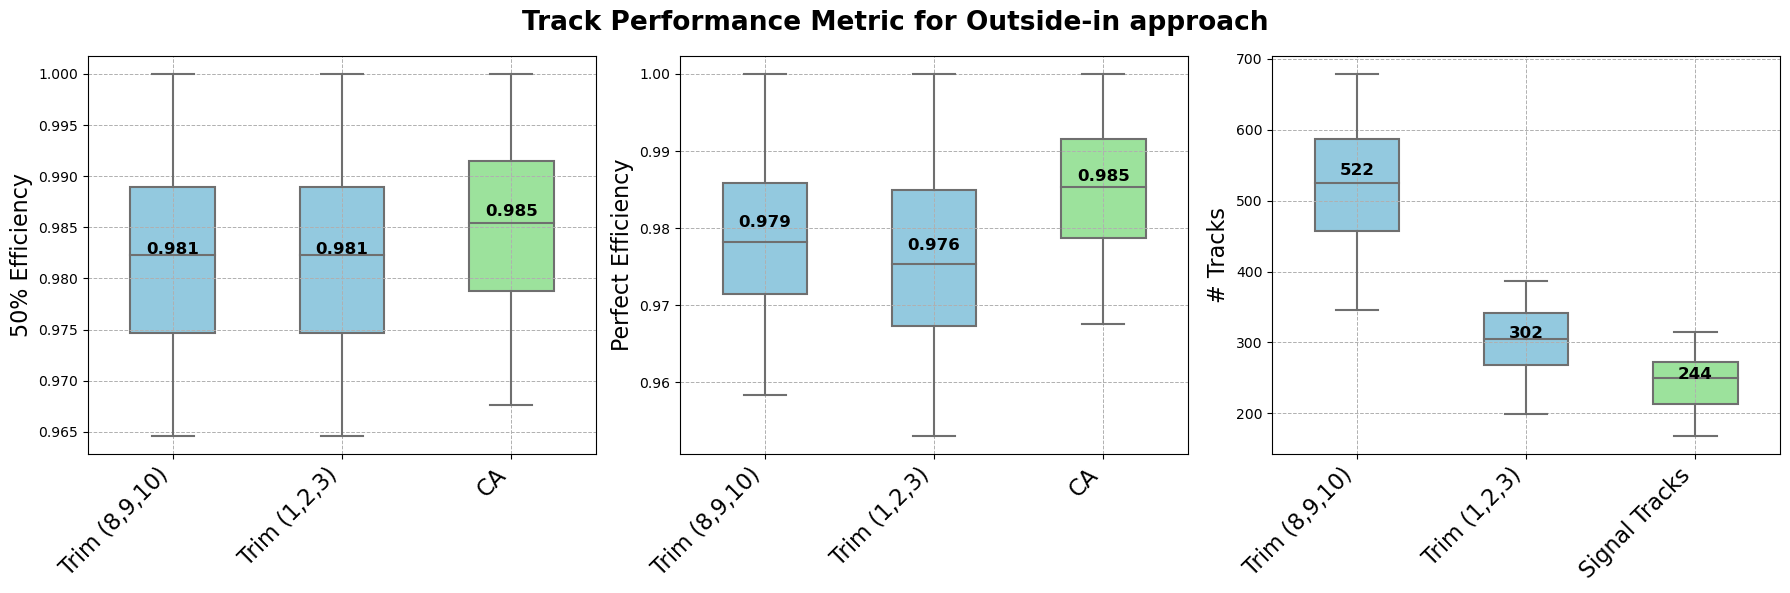

In [58]:

# Set up figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Titles and x-tick labels for each subplot
titles = ['Efficiency', 'Perfect Efficiency', 'Total Tracks']
x_tick_labels = [[ 'Trim (8,9,10)','Trim (1,2,3)', 'CA'],
                 [ 'Trim (8,9,10)', 'Trim (1,2,3)','CA'],
                 [ 'Trim (8,9,10)', 'Trim (1,2,3)','Signal Tracks']]

# Colors and y-axis labels for each subplot
y_labels = ['50% Efficiency', 'Perfect Efficiency', '# Tracks']

# Loop to create each subplot
for i, ax in enumerate(axes):
    # Prepare data as a DataFrame for each subplot
    plot_data = pd.DataFrame(data[i]).T
    plot_data.columns = x_tick_labels[i]
    
    # Box plot for each subplot
    colors = ['skyblue', 'skyblue', 'lightgreen']  # Set last boxplot to green
    sns.boxplot(data=plot_data, ax=ax, showfliers=False, width=0.5, palette=colors)
    
    # Calculate and annotate the means
    means = plot_data.mean()
    for j, mean in enumerate(means):
        offset = 0.001 if i < 2 else (10 if j == 0 else 0)  # Customize offset for each plot
        ax.text(j, mean + offset, f'{mean:.3f}' if i < 2 else f'{mean:.0f}',
                color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Set titles, labels, and x-tick labels
    # ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(y_labels[i], fontsize=16)
    ax.set_xticklabels(x_tick_labels[i], rotation=45, ha='right',fontsize = 16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adjust layout to prevent overlap
plt.suptitle('Track Performance Metric for Outside-in approach',fontsize = 19,fontweight = 'bold')
plt.tight_layout()

# Save the figure at high DPI for quality
plt.savefig('ca_metric_outside_trims.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [59]:

base = "generated_tracks/triplet_level/inside_out/"
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')

df1 = ca_metric_df
df1['perfect_eff'] = df1['per_eff']
df3 = pd.read_csv(f'{base}final_metric_hit.csv')


base = "generated_tracks/triplet_level/outside_in/"
df4 = pd.read_csv(f'{base}final_metric_hit.csv')




data =[
    [df3.eff, df4.eff, df1.eff],
    [df3.perfect_eff, df4.perfect_eff, df1.perfect_eff],
    [df3.total_tracks, df4.total_tracks, df1.signal_tracks],
]


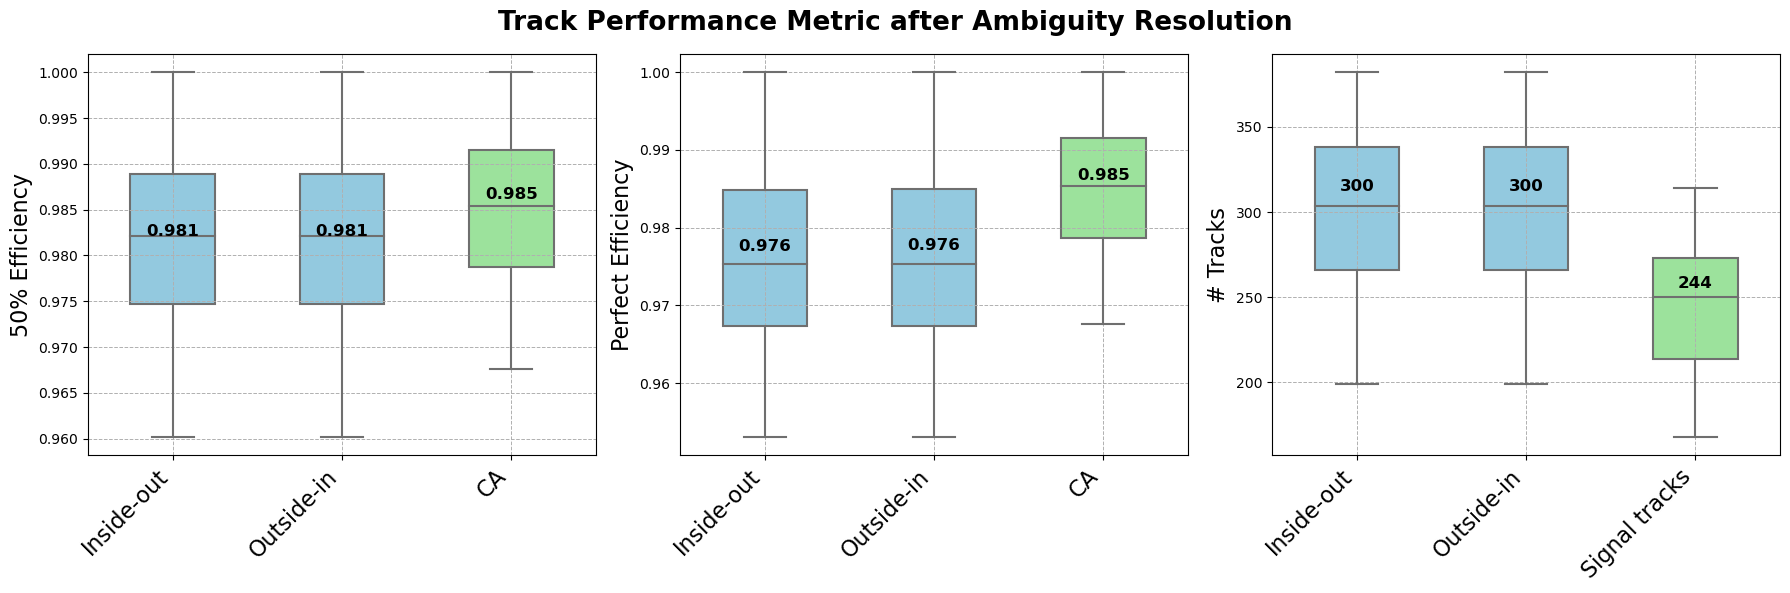

In [60]:

# Set up figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# Titles and x-tick labels for each subplot
titles = ['Efficiency', 'Perfect Efficiency', 'Total Tracks']
x_tick_labels = [[ 'Inside-out','Outside-in', 'CA'],
                 [ 'Inside-out','Outside-in', 'CA'],
                 [ 'Inside-out','Outside-in', 'Signal tracks']]

# Colors and y-axis labels for each subplot
y_labels = ['50% Efficiency', 'Perfect Efficiency', '# Tracks']

# Loop to create each subplot
for i, ax in enumerate(axes):
    # Prepare data as a DataFrame for each subplot
    plot_data = pd.DataFrame(data[i]).T
    plot_data.columns = x_tick_labels[i]
    
    # Box plot for each subplot
    colors = ['skyblue', 'skyblue', 'lightgreen']  # Set last boxplot to green
    sns.boxplot(data=plot_data, ax=ax, showfliers=False, width=0.5, palette=colors)
    
    # Calculate and annotate the means
    means = plot_data.mean()
    for j, mean in enumerate(means):
        offset = 0.001 if i < 2 else (10 if j == 0 else 10)  # Customize offset for each plot
        ax.text(j, mean + offset, f'{mean:.3f}' if i < 2 else f'{mean:.0f}',
                color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Set titles, labels, and x-tick labels
    # ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(y_labels[i], fontsize=16)
    ax.set_xticklabels(x_tick_labels[i], rotation=45, ha='right',fontsize = 16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adjust layout to prevent overlap
plt.suptitle('Track Performance Metric after Ambiguity Resolution',fontsize = 19,fontweight = 'bold')
plt.tight_layout()

# Save the figure at high DPI for quality
plt.savefig('track_sharing_hits.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [61]:
df = pd.read_csv('em_plots/metric_after_pt_cut_1.0.csv')
df

Unnamed: 0       eff       pur  total_tracks  perfect_eff  perfect_pur
0            0  0.954386  0.996337           273     0.947368     0.989011
1            1  0.965909  0.992218           257     0.962121     0.988327
2            2  0.968421  0.989247           279     0.961404     0.982079
3            3  0.964824  0.994819           193     0.959799     0.989637
4            4  0.955466  0.995781           237     0.943320     0.983122
..         ...       ...       ...           ...          ...          ...
85          85  0.982270  0.992832           279     0.975177     0.985663
86          86  0.967509  0.996283           269     0.967509     0.996283
87          87  0.960289  0.996255           267     0.956679     0.992509
88          88  0.974684  0.995690           232     0.970464     0.991379
89          89  0.969697  0.988417           259     0.965909     0.984556

[90 rows x 6 columns]

In [62]:
data =[
    [df.eff, df.perfect_eff],
    [df.pur, df.perfect_pur],
    [df.total_tracks,  df1.signal_tracks],
]


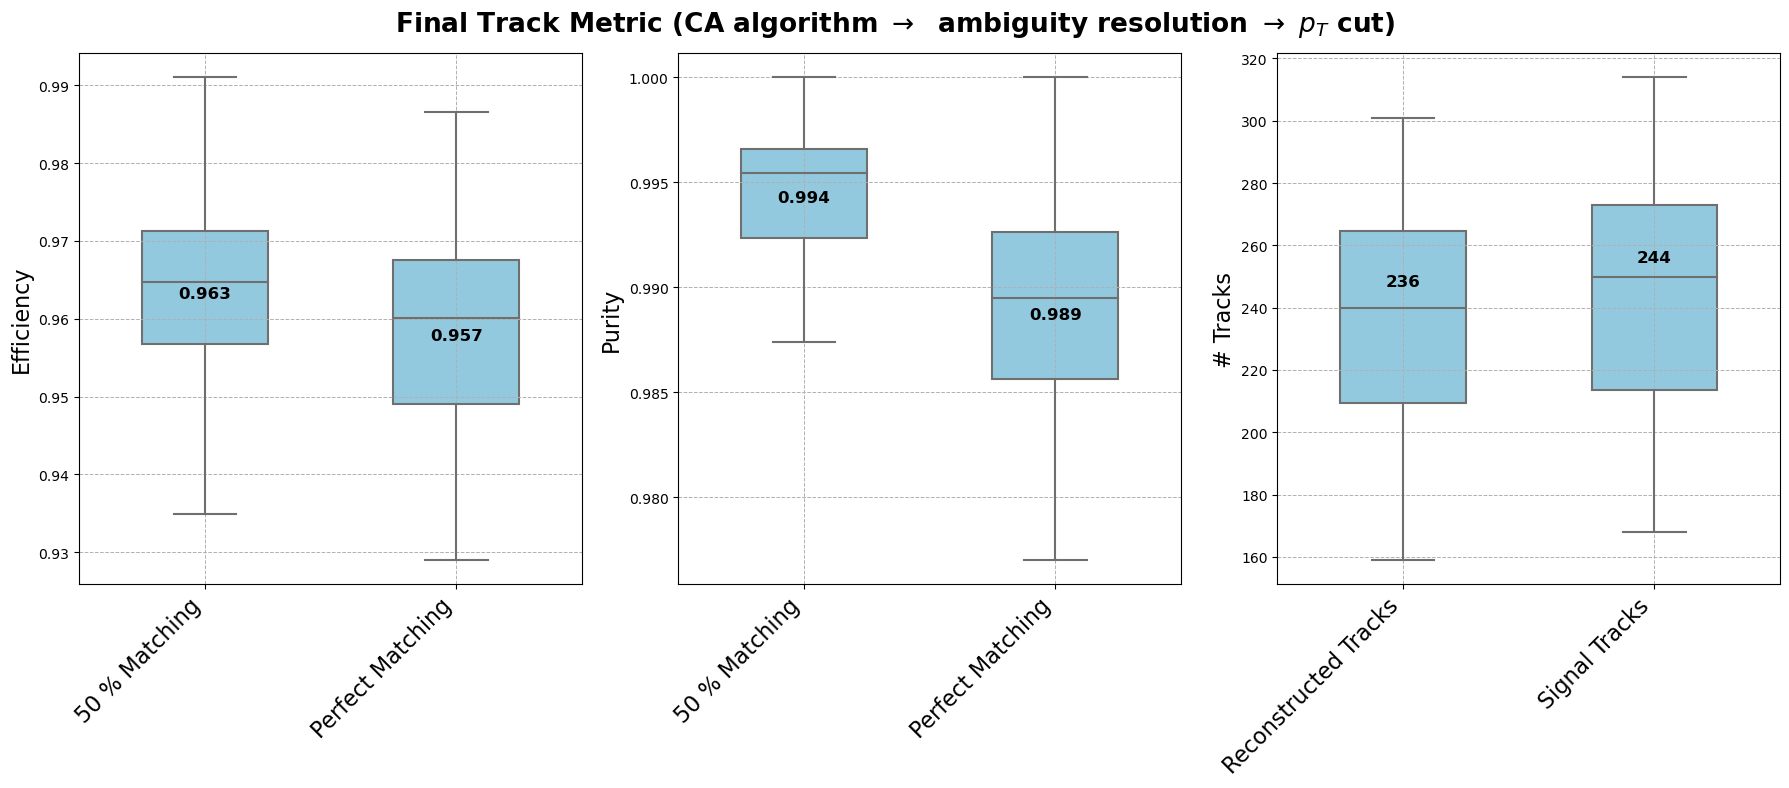

In [78]:



# Set up figure with 1 row and 3 columns for the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
axes = axes.flatten()

# Titles and x-tick labels for each subplot
titles = ['Purity', 'Perfect Purity', 'Total Tracks']
x_tick_labels = [[ '50 % Matching','Perfect Matching' ],
                 [ '50 % Matching','Perfect Matching' ],
                 [ 'Reconstructed Tracks','Signal Tracks']]

# Colors and y-axis labels for each subplot
y_labels = ['Efficiency', 'Purity', '# Tracks']

# Loop to create each subplot
for i, ax in enumerate(axes):
    # Prepare data as a DataFrame for each subplot
    plot_data = pd.DataFrame(data[i]).T
    plot_data.columns = x_tick_labels[i]
    
    # Box plot for each subplot
    colors = ['skyblue', 'skyblue', 'lightgreen']  # Set last boxplot to green
    sns.boxplot(data=plot_data, ax=ax, showfliers=False, width=0.5, palette=colors)
    
    # Calculate and annotate the means
    means = plot_data.mean()
    for j, mean in enumerate(means):
        offset = -0.0004 if i < 2 else (10 if j in [0,1] else 0)  # Customize offset for each plot
        ax.text(j, mean + offset, f'{mean:.3f}' if i < 2 else f'{mean:.0f}',
                color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Set titles, labels, and x-tick labels
    # ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel(y_labels[i], fontsize=16)
    ax.set_xticklabels(x_tick_labels[i], rotation=45, ha='right',fontsize = 16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adjust layout to prevent overlap
plt.suptitle(r'Final Track Metric (CA algorithm $\rightarrow$  ambiguity resolution $\rightarrow$ $p_T$ cut)',fontsize = 19,fontweight = 'bold')
plt.tight_layout()

# Save the figure at high DPI for quality
plt.savefig('final_final.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



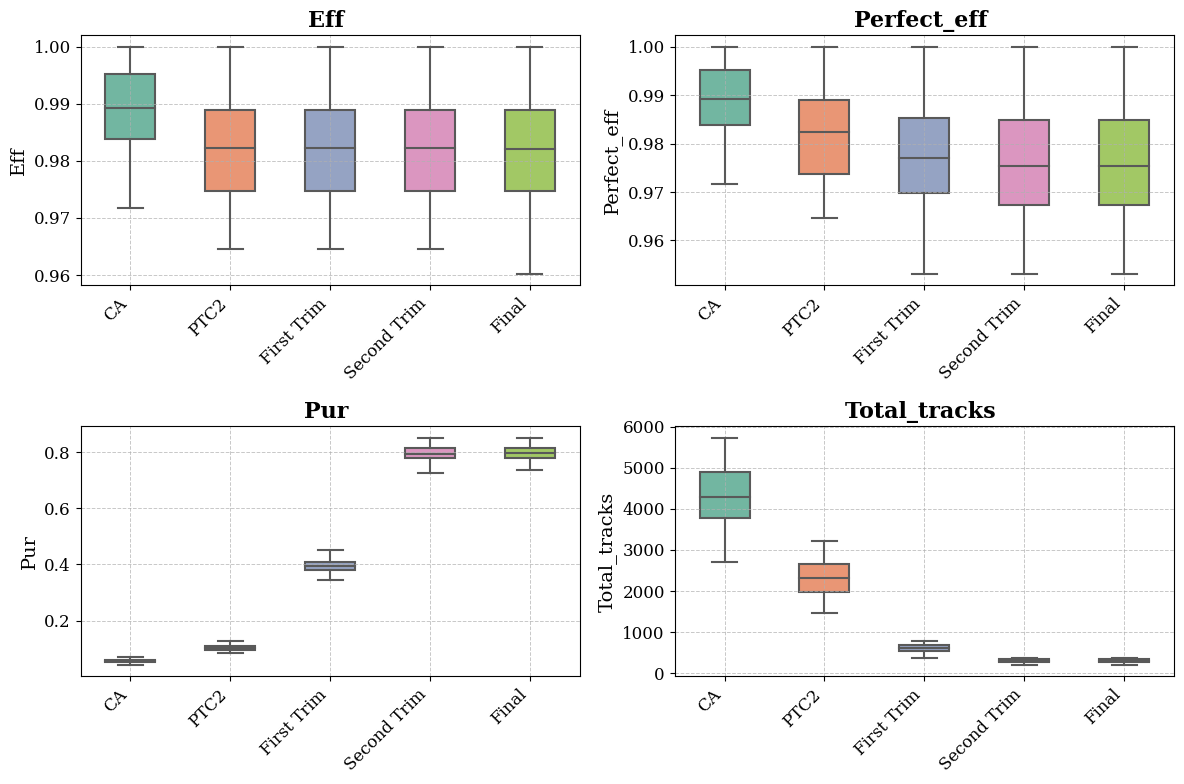

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Update matplotlib for scientific plots
plt.rc('font', family='serif')  # Use a serif font (like Times New Roman)
plt.rcParams.update({'font.size': 12})  # Set a larger font size for clarity
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100  # Higher DPI for better quality in documents

def plot_metric_boxplots(dataframes, labels):
    """
    Generates box plots for 'eff', 'pur', 'total_tracks', 'perfect_eff' across multiple dataframes.
    
    Parameters:
    dataframes (list): List of pandas DataFrames to plot.
    labels (list): Corresponding list of names for the DataFrames.
    
    The function will create 4 subplots for each metric.
    """
    if len(dataframes) != len(labels):
        raise ValueError("The number of dataframes and labels must be the same.")
    
    columns = ['eff','perfect_eff', 'pur', 'total_tracks', ]
    
    # Set up a larger figure size for high-quality output in the thesis
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    # Loop through each column to create boxplots for all DataFrames
    for i, col in enumerate(columns):
        data = pd.concat([df[col].rename(label) for df, label in zip(dataframes, labels)], axis=1)

        # Create the boxplot without outliers and with scientific width
        sns.boxplot(data=data, ax=axes[i], showfliers=False, width=0.5, palette="Set2")

        # Set the title and labels for each subplot
        axes[i].set_title(f'{col.capitalize()} ', fontsize=16, weight='bold')
        # axes[i].set_xlabel('Data Split', fontsize=14)
        axes[i].set_ylabel(f'{col.capitalize()}', fontsize=14)
        
        # Format x-tick labels and rotate them for better readability
        axes[i].set_xticklabels(labels, rotation=45, ha='right')

        # Add a light grid for better visual comparison
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Adjust the layout for no overlap
    plt.tight_layout()

    # Save the figure for use in the thesis (high-quality)
    plt.savefig('scientific_boxplots.png', bbox_inches='tight', dpi=300)  # Save at high DPI for quality
    
    # Show the plot
    plt.show()

# Example usage with your DataFrames
base = "generated_tracks/triplet_level/inside_out/"

# Example usage with your DataFrames
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')
metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_first_trim_df = pd.read_csv(f'{base}metric_after_first_trim.csv')
metric_after_second_trim_df = pd.read_csv(f'{base}metric_after_second_trim.csv')
final_metric_hit_df = pd.read_csv(f'{base}final_metric_hit.csv')

# final_metric_hit_df_1 = pd.read_csv(f'{base}final_metric_hit.csv')
# final_metric_hit_df_2 = pd.read_csv('generated_tracks/triplet_level/inside_out/final_metric_hit.csv')

plot_metric_boxplots(
    dataframes=[ca_metric_df, metric_after_ptc2_cut_df, metric_after_first_trim_df, metric_after_second_trim_df, final_metric_hit_df],
    labels=['CA', 'PTC2', 'First Trim', 'Second Trim', 'Final']
)


In [8]:
ca_metric_df

eff       pur  total_tracks  perfect_eff  total_signal_tracks  \
0   0.982456  0.052278          5356     0.982456                  285   
1   0.988636  0.053693          4861     0.988636                  264   
2   0.982456  0.053486          5235     0.982456                  285   
3   0.994975  0.051375          3854     0.994975                  199   
4   0.983806  0.061395          3958     0.983806                  247   
..       ...       ...           ...          ...                  ...   
85  1.000000  0.063671          4429     1.000000                  282   
86  0.992780  0.057640          4771     0.992780                  277   
87  0.989170  0.049719          5511     0.989170                  277   
88  0.983122  0.050043          4656     0.983122                  237   
89  0.992424  0.049165          5329     0.992424                  264   

    perfect_pur  
0      0.052278  
1      0.053693  
2      0.053486  
3      0.051375  
4      0.061395  
..          ...  
85     0.063671  
86     0.057640  
87     0.049719  
88     0.050043  
89     0.049165  

[90 rows x 6 columns]

In [3]:

# Update matplotlib for scientific plots
plt.rc('font', family='serif')  # Use a serif font (like Times New Roman)
plt.rcParams.update({'font.size': 12})  # Set a larger font size for clarity
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100  # Higher DPI for better quality in documents

def plot_metric_boxplots_with_mean(dataframes, labels):
    """
    Generates box plots for 'eff', 'pur', 'total_tracks', 'perfect_eff' across multiple dataframes,
    and overlays the mean of each distribution outside the box.
    
    Parameters:
    dataframes (list): List of pandas DataFrames to plot.
    labels (list): Corresponding list of names for the DataFrames.
    
    The function will create 4 subplots for each metric.
    """
    if len(dataframes) != len(labels):
        raise ValueError("The number of dataframes and labels must be the same.")
    
    columns = ['eff', 'pur', 'perfect_eff', 'perfect_pur']
    
    # Set up a larger figure size for high-quality output in the thesis
    fig, axes = plt.subplots(3, 1, figsize=(12, 8))
    axes = axes.flatten()

    # Loop through each column to create boxplots for all DataFrames
    for i, col in enumerate(columns):
        data = pd.concat([df[col].rename(label) for df, label in zip(dataframes, labels)], axis=1)

        # Create the boxplot without outliers and with scientific width
        sns.boxplot(data=data, ax=axes[i], showfliers=False, width=0.5, palette="Set2")

        # Overlay the mean for each box as a star symbol
        means = data.mean()  # Calculate the mean for each DataFrame in the current column
        for j, mean in enumerate(means):
            # Annotate the mean value just above the box
            axes[i].text(j, mean + (0.01 * mean), f'{mean:.4f}', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold')

            # Optionally draw a star at the mean position
            axes[i].plot(j, mean, marker='*', color='orange', markersize=10)

        # Set the title and labels for each subplot
        axes[i].set_title(f'{col.capitalize()} Distribution', fontsize=16, weight='bold')
        axes[i].set_xlabel('Data Split', fontsize=14)
        axes[i].set_ylabel(f'{col.capitalize()}', fontsize=14)
        
        # Format x-tick labels and rotate them for better readability
        axes[i].set_xticklabels(labels, rotation=45, ha='right')

        # Add a light grid for better visual comparison
        axes[i].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Adjust the layout for no overlap
    plt.tight_layout()

    # Save the figure for use in the thesis (high-quality)
    plt.savefig('scientific_boxplots_with_mean_above.png', bbox_inches='tight', dpi=300)  # Save at high DPI for quality
    
    # Show the plot
    plt.show()


KeyError: 'perfect_pur'

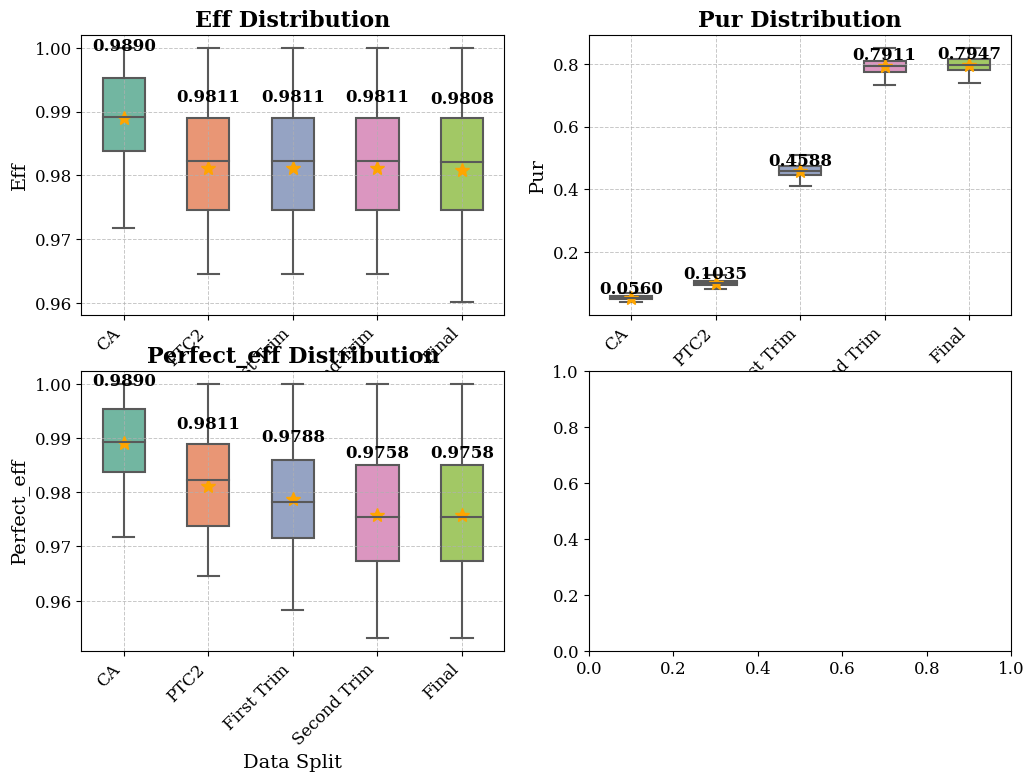

In [4]:

# Load your data
base = "generated_tracks/triplet_level/outside_in/"

# Example usage with your DataFrames
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')
metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_first_trim_df = pd.read_csv(f'{base}metric_after_first_trim.csv')
metric_after_second_trim_df = pd.read_csv(f'{base}metric_after_second_trim.csv')
final_metric_hit_df = pd.read_csv(f'{base}final_metric_hit.csv')


# Call the plot function

plot_metric_boxplots_with_mean(
    dataframes=[ca_metric_df, metric_after_ptc2_cut_df, metric_after_first_trim_df, metric_after_second_trim_df, final_metric_hit_df],
    labels=['CA', 'PTC2', 'First Trim', 'Second Trim', 'Final']
)

# inside_out

KeyError: 'perfect_pur'

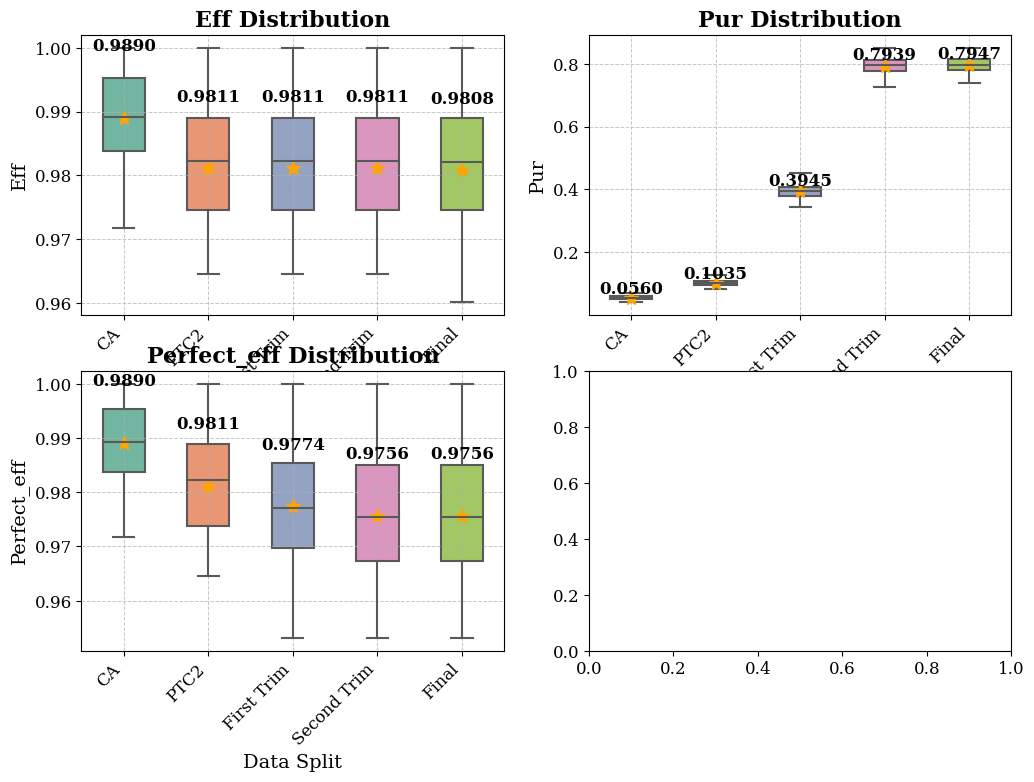

In [6]:

# Load your data
base = "generated_tracks/triplet_level/inside_out/"

# Example usage with your DataFrames
ca_metric_df = pd.read_csv(f'{base}ca_metric.csv')
metric_after_ptc2_cut_df = pd.read_csv(f'{base}metric_after_ptc2_cut.csv')
metric_after_first_trim_df = pd.read_csv(f'{base}metric_after_first_trim.csv')
metric_after_second_trim_df = pd.read_csv(f'{base}metric_after_second_trim.csv')
final_metric_hit_df = pd.read_csv(f'{base}final_metric_hit.csv')


# Call the plot function

plot_metric_boxplots_with_mean(
    dataframes=[ca_metric_df, metric_after_ptc2_cut_df, metric_after_first_trim_df, metric_after_second_trim_df, final_metric_hit_df],
    labels=['CA', 'PTC2', 'First Trim', 'Second Trim', 'Final']
)

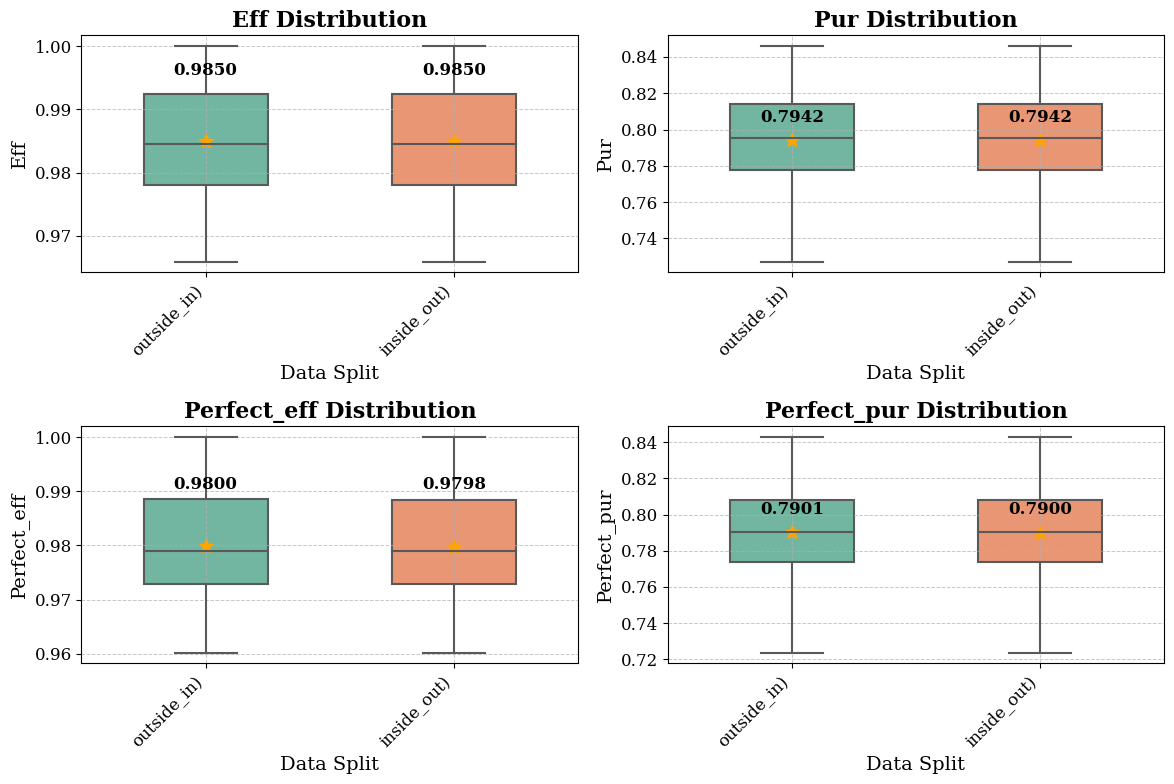

In [17]:

final_metric_hit_df_1 = pd.read_csv(f'generated_tracks/triplet_level/outside_in/final_metric_hit.csv')
final_metric_hit_df_2 = pd.read_csv('generated_tracks/triplet_level/inside_out/final_metric_hit.csv')




# Call the plot function

plot_metric_boxplots_with_mean(
    dataframes=[final_metric_hit_df_1, final_metric_hit_df_2],
labels=['outside_in)', 'inside_out)']
)

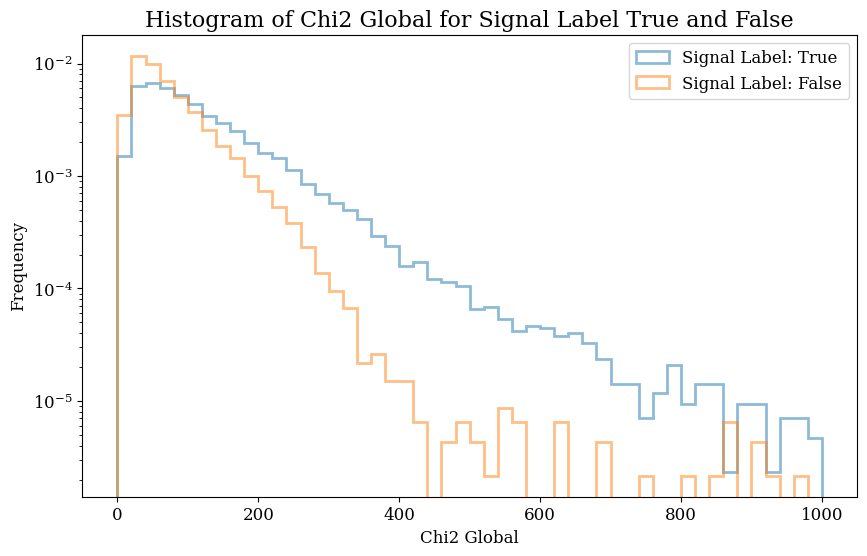

In [14]:
df = chi2_dataframe
# Assuming df is your dataframe with chi2_global and signal_label columns
# Separate the data based on signal_label
chi2_true = df[df['signal_label'] == True]['chi2_global']
chi2_false = df[df['signal_label'] == False]['chi2_global']

# Create the plot
plt.figure(figsize=(10,6))

# Plot the histogram for signal_label == True
plt.hist(chi2_true, density = True,bins=50, alpha=0.5, label='Signal Label: True', histtype='step', linewidth=2,range=(0,1000))

# Plot the histogram for signal_label == False
plt.hist(chi2_false, density = True,bins=50, alpha=0.5, label='Signal Label: False', histtype='step', linewidth=2,range=(0,1000))
# plt.yscale('log')

# Add labels and title
plt.xlabel('Chi2 Global')
plt.ylabel('Frequency')
plt.title('Histogram of Chi2 Global for Signal Label True and False')

# Add legend
plt.legend()
plt.yscale('log')

# Show the plot
plt.show()


# inside -> outside ->

In [1]:
from utils.readfile import*
from utils.barrel_data import*
from utils.doublet import*
from utils.triplet import*
from utils.plotting_utils import*
from utils.track_reconstruction_metric_triplet_level  import*
from utils.track_reconstruction_metric_hit_level  import*
from importlib import reload
import yaml
import json
from tqdm import tqdm
import pickle
from utils.cellular_automata import*
from utils.triplet_fit import*
class generated_tracks:
    pass

pd.set_option('display.max_columns', None) 

with open('files/pdgids.pkl','rb') as f:
    pdg_dict = pickle.load(f)
with open("config.yaml", "r") as f:

    # Load and parse the YAML file
    config = yaml.safe_load(f)
barrel_data = get_barrel_data(config)
config['sigma_cut'] = 3
layer_files = ['z0','dtheta','dkappa']
get_layer_wise_data(layer_files,config)
def fname(eno):


    triplet_arr_fname  = f'generated_tracks/triplets/chi2_7_triplet_arr{eno}.pkl'
    triplet_df_fname  = f'generated_tracks/triplets/chi2_7_triplet_df{eno}.pkl'
    ca_fname = f'generated_tracks/ca_class_eno_{eno}.pkl'
    # triplet_fname = stage_dir+f'{track_segments}_eventno_'+str(eno)+'_signal_'+str(signal)+'_z0_'+str(z0)+'_pt_'+str(pt)+'.pkl'
    return triplet_arr_fname,triplet_df_fname,ca_fname


def load_triplets(eno):
    triplet_arr_fname,triplet_df_fname,_ = fname(eno)
    with open(triplet_arr_fname,'rb') as f:
        triplet_arr = pickle.load(f)
    with open(triplet_df_fname,'rb') as f:
        triplet_df = pickle.load(f)
    config['chi_square_cut'] = 6
    return triplet_array_after_chi2_cut(triplet_arr,triplet_df,config)    


def load_ca(eno):
    _,_,ca_fname = fname(eno)
    with open(ca_fname,'rb') as f:
        ca = pickle.load(f)
    return ca


In [4]:
pt_truth_name = 'em_plots/truth_momentum.pkl'

with open(pt_truth_name,'rb') as f:
    pt_truth = pickle.load(f)



In [47]:
pt_all = 

for eno in range(90):
    ca = load_ca(eno)
    eff = ca.ca_metric['eff']
    pur = ca.ca_metric['pur']
    total_tracks = ca.ca_metric['total_tracks']
    perfect_eff = ca.ca_metric['per_eff']

    ca_metric['eff'].append(eff)
    ca_metric['pur'].append(pur)
    ca_metric['total_tracks'].append(total_tracks)
    ca_metric['perfect_eff'].append(perfect_eff)

In [50]:
##these snippets are deiganed for the trimming analysis of the tracks

##load ca class

# triplet_arr,triplet_df = load_triplets(0)
ca_metric_df = pd.DataFrame(ca_metric)
ca_metric_df.to_csv('generated_tracks/triplet_level/inside_out/ca_metric.csv',index=False)

In [16]:
pt_truth = []
pt_false = []

chi2_truth = []
chi2_false = []

for eno in tqdm(range(90)):
    ca_class = load_ca(eno)
    ca_class.pt = ca_class.momentum_array*(np.sin(ca_class.theta_array))

    ca_class.sigma_pt = ca_class.pt*ca_class.sigma_p_array
    for i in range(len(ca_class.label)):
        if(ca_class.label[i]):
            pt_truth.append(ca_class.pt[i])
            chi2_truth.append(ca_class.chi2_gttf_array[i])
        else:
            pt_false.append(ca_class.pt[i])
            chi2_false.append(ca_class.chi2_gttf_array[i])




100%|██████████| 90/90 [00:03<00:00, 23.08it/s]


In [15]:
p_all = np.concatenate([pt_truth,pt_false])
# chi2_all = np.concatenate([chi2_truth,chi2_false])

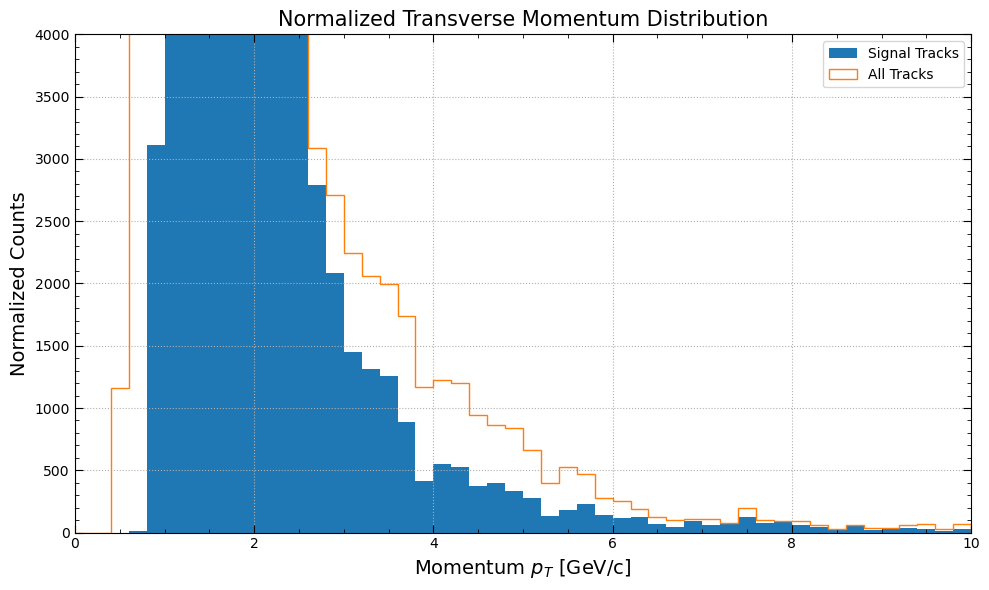

In [25]:

plt.figure(figsize=(10, 6))

plt.hist(pt_truth, bins=50, range=(0, 10), label='Signal Tracks')
plt.hist(pt_all, bins=50, range=(0, 10), histtype='step', label='All Tracks')

# Vertical line at p = 1 GeV
# plt.axvline(x=1, color='k', linestyle='--', label='p = 1 GeV')

plt.legend()
plt.xlabel(r'Momentum $p_T$ [GeV/c]',fontsize = 14)
plt.ylabel('Normalized Counts',fontsize = 14)
plt.title('Normalized Transverse Momentum Distribution',fontsize = 15)
plt.ylim(0,4000)
# Set x-axis to start from 0
plt.xlim(0, 10)

# Add minor ticks
plt.minorticks_on()

# Adjust tick parameters for better visibility
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Add grid for better readability
plt.grid(which='major', linestyle=':', alpha=1)

plt.tight_layout()
plt.savefig('thesis_plots/momentum_fitted.png', dpi=300)
plt.show()

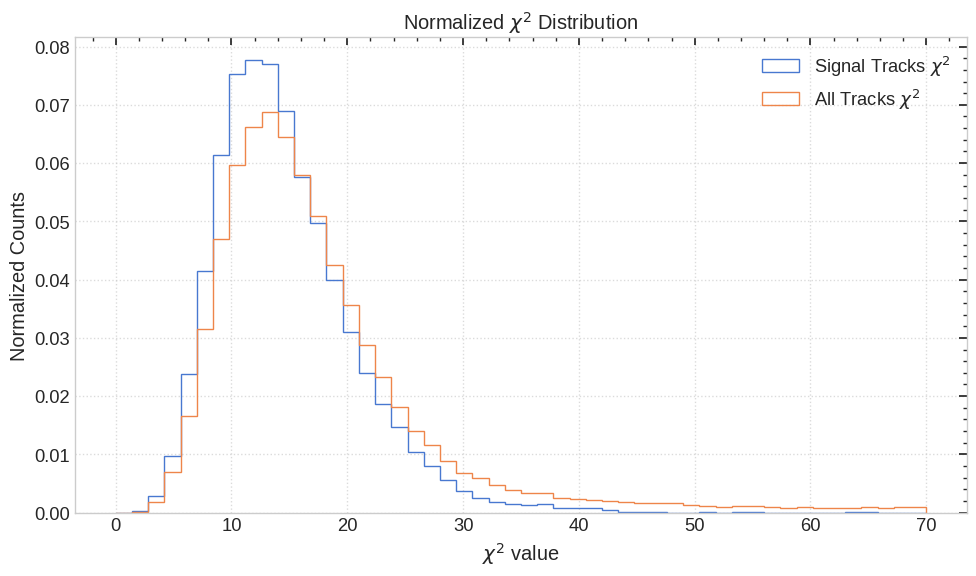

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(chi2_truth, bins=50, range=(0, 70), density=True, histtype='step', label=r'Signal Tracks $\chi^2$')
plt.hist(chi2_all, bins=50, range=(0, 70), density=True, histtype='step', label=r'All Tracks $\chi^2$')

plt.legend()
plt.xlabel(r'$\chi^2$ value')
plt.ylabel(r'Normalized Counts')
plt.title(r'Normalized $\chi^2$ Distribution')

# Set x-axis to start from 0
# plt.xlim(0, 20)

# Add minor ticks
plt.minorticks_on()

# Adjust tick parameters for better visibility
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.tick_params(which='major', length=6)
plt.tick_params(which='minor', length=3)

# Add grid for better readability
plt.grid(which='major', linestyle=':', alpha=0.7)

plt.tight_layout()
plt.savefig('thesis_plots/chi2_fitted.png', dpi=300)
plt.show()

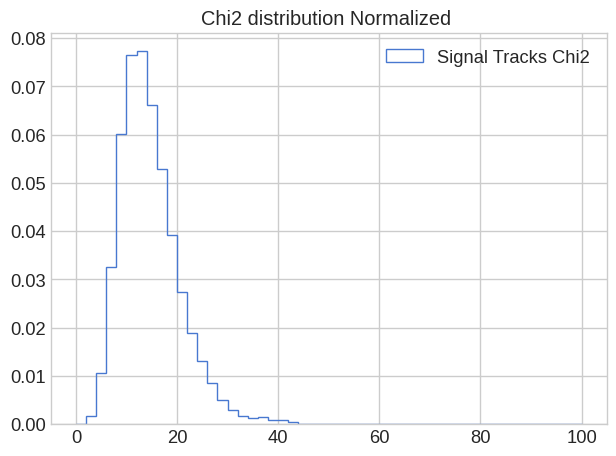

In [69]:

plt.hist(chi2_truth,bins=50,range = (0,100),density = True,histtype='step',label  ='Signal Tracks Chi2')
# plt.hist(chi2_false,bins=50,density = True,range = (0,100),histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.title('Chi2 distribution Normalized ')
plt.legend()
plt.show()



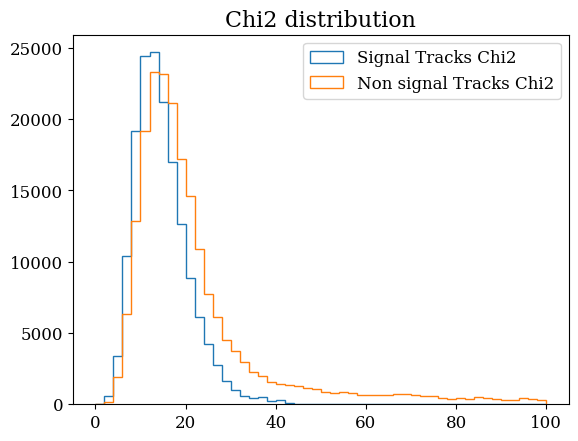

In [28]:

plt.hist(chi2_truth,bins=50,range = (0,100),histtype='step',label  ='Signal Tracks Chi2')
plt.hist(chi2_false,bins=50,range = (0,100),histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.title('Chi2 distribution')
plt.legend()
plt.show()



In [10]:
##do the same plotting for chi square 
chi2_truth = []
chi2_false = []

eno = 0


ca = load_ca(eno)
triplet_arr,triplet_df = load_triplets(eno)
hdf,pdf = read_files(eno)
hits_df = load_barrel_df(hdf)
signal_df = get_signal(hdf,pdf,config)

for i in range(len(ca.label)):
    if(ca.label[i]):
        chi2_truth.append(ca.chi2_gttf_array[i])
    else:
        chi2_false.append(ca.chi2_gttf_array[i])




In [11]:
print(ca.ca_metric)

{'eff': 0.9754385964912281, 'pur': 0.05388641209536732, 'per_eff': 0.9754385964912281, 'total_tracks': 5159}


In [12]:
##apply pt cut aka 1000 MeV and find indexes
label_after_ptc2_cut = []
chi2_after_ptc2_cut = []


index_after_ptc2_cut = []
for i in range(len(ca.label)):
    if(ca.pt[i]>=1000 and ca.chi2_gttf_array[i]<45):
        index_after_ptc2_cut.append(i)
        label_after_ptc2_cut.append(ca.label[i])
        chi2_after_ptc2_cut.append(ca.chi2_gttf_array[i])



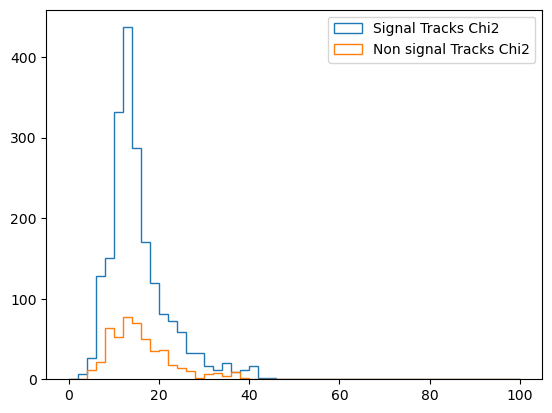

In [13]:
chi2_truth_after_ptc2_cut = []
chi2_false_after_ptc2_cut = []

for i in range(len(label_after_ptc2_cut)):
    if(label_after_ptc2_cut[i]):
        
        chi2_truth_after_ptc2_cut.append(chi2_after_ptc2_cut[i])
    else:
        chi2_false_after_ptc2_cut.append(chi2_after_ptc2_cut[i])


plt.hist(chi2_truth_after_ptc2_cut,bins=50,range = (0,100),histtype='step',label  ='Signal Tracks Chi2')
plt.hist(chi2_false_after_ptc2_cut,bins=50,range = (0,100),histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.legend()
plt.show()




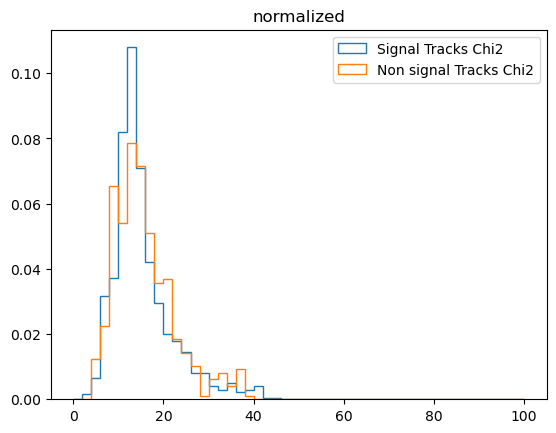

In [14]:
# plt.hist(chi2_truth_after_ptc2_cut,bins=50,range = (0,100),histtype='step',label  ='Signal Tracks Chi2')
# plt.hist(chi2_false_after_ptc2_cut,bins=50,range = (0,100),histtype='step',label = 'Non signal Tracks Chi2')
# ##parallel y axis line at x = 1
# plt.legend()
# plt.show()
#normalized upper distribution plots

plt.hist(chi2_truth_after_ptc2_cut,bins=50,range = (0,100),density = True,histtype='step',label  ='Signal Tracks Chi2')
plt.hist(chi2_false_after_ptc2_cut,bins=50,range = (0,100),density = True,histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.legend()
plt.title('normalized')
plt.show()

## track metric after ptc2 cut



In [15]:
##new tracks after ptc2 cut
tracks_after_ptc2_cut = []

for iter in index_after_ptc2_cut:
    tracks_after_ptc2_cut.append(ca.track_collection[iter])
print("before chi2pt cut\n")
print(ca.ca_metric)





before chi2pt cut

{'eff': 0.9754385964912281, 'pur': 0.05388641209536732, 'per_eff': 0.9754385964912281, 'total_tracks': 5159}


In [16]:
eff,pur,per_eff,track_collection_hits = track_reco_meric(tracks_after_ptc2_cut,
                 triplet_arr,
                 triplet_df,
                 hits_df,
                 signal_df)

print("after chi2pt cut\n")
print("efficiency",eff)
print("purity",pur)
print("perfect efficiency",per_eff)
print("total tracks",len(track_collection_hits))

after chi2pt cut

efficiency 0.9754385964912281
purity 0.1105807478122514
perfect efficiency 0.9754385964912281
total tracks 2514


In [17]:
track_after_first_trim,chi2_after_first_trim,label_after_first_trim  = disconnecting_the_graph(tracks_after_ptc2_cut,np.array(chi2_after_ptc2_cut),label_after_ptc2_cut,0)

eff,pur,per_eff,track_collection_hits = track_reco_meric(track_after_first_trim,
                    triplet_arr,
                    triplet_df,
                    hits_df,
                    signal_df
                    )


print("after first trim\n")
print("efficiency",eff)
print("purity",pur)
print("perfect efficiency",per_eff)
print("total tracks",len(track_collection_hits))


after first trim

efficiency 0.9754385964912281
purity 0.45799011532125206
perfect efficiency 0.968421052631579
total tracks 607


In [18]:
##second trim 

track_after_second_trim,chi2_after_second_trim,label_after_second_trim  = disconnecting_the_graph(track_after_first_trim,np.array(chi2_after_first_trim),np.array(label_after_first_trim),-1)

eff,pur,per_eff,track_collection_hits = track_reco_meric(track_after_second_trim,
                    triplet_arr,
                    triplet_df,
                    hits_df,
                    signal_df
                    )

print("after second trim\n")
print("efficiency",eff)
print("purity",pur)
print("perfect efficiency",per_eff)
print("total tracks",len(track_collection_hits))


after second trim

efficiency 0.9754385964912281
purity 0.8034682080924855
perfect efficiency 0.968421052631579
total tracks 346


In [19]:
final_track_hit,final_chi2_hit = track_sharing_hits(track_collection_hits,np.array(chi2_after_second_trim))
eff,pur,per_eff = track_metric_hit_level(final_track_hit,hits_df,signal_df)

print("after hit level\n")
print("efficiency",eff)
print("purity",pur)
print("perfect efficiency",per_eff)
print("total tracks",len(final_track_hit))


after hit level

efficiency 0.9754385964912281
purity 0.8104956268221575
perfect efficiency 0.968421052631579
total tracks 343


In [20]:
chi2_after_truth_all_steps = []
chi2_after_false_all_steps = []
for i in range(len(label_after_second_trim)):
    if(label_after_second_trim[i]):
        chi2_after_truth_all_steps.append(chi2_after_second_trim[i])
    else:
        chi2_after_false_all_steps.append(chi2_after_second_trim[i])


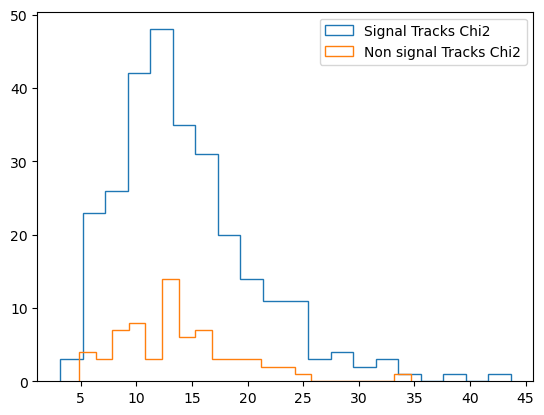

In [21]:
plt.hist(chi2_after_truth_all_steps,bins=20,histtype='step',label  ='Signal Tracks Chi2')
plt.hist(chi2_after_false_all_steps,bins=20,histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.legend()
plt.show()



In [32]:

chi2_after_truth_all_steps = []
chi2_after_false_all_steps = []

for eno in tqdm(range(90)):
    ca = load_ca(eno)
    triplet_arr,triplet_df = load_triplets(eno)
    hdf,pdf = read_files(eno)
    hits_df = load_barrel_df(hdf)
    signal_df = get_signal(hdf,pdf,config)

    label_after_ptc2_cut = []
    chi2_after_ptc2_cut = []


    index_after_ptc2_cut = []
    for i in range(len(ca.label)):
        if(ca.pt[i]>=1000 and ca.chi2_gttf_array[i]<45):
            index_after_ptc2_cut.append(i)
            label_after_ptc2_cut.append(ca.label[i])
            chi2_after_ptc2_cut.append(ca.chi2_gttf_array[i])



    chi2_truth_after_ptc2_cut = []
    chi2_false_after_ptc2_cut = []

    for i in range(len(label_after_ptc2_cut)):
        if(label_after_ptc2_cut[i]):
            
            chi2_truth_after_ptc2_cut.append(chi2_after_ptc2_cut[i])
        else:
            chi2_false_after_ptc2_cut.append(chi2_after_ptc2_cut[i])


    ##new tracks after ptc2 cut
    tracks_after_ptc2_cut = []

    for iter in index_after_ptc2_cut:
        tracks_after_ptc2_cut.append(ca.track_collection[iter])        

    track_after_first_trim,chi2_after_first_trim,label_after_first_trim  = disconnecting_the_graph(tracks_after_ptc2_cut,np.array(chi2_after_ptc2_cut),label_after_ptc2_cut,0)


    track_after_second_trim,chi2_after_second_trim,label_after_second_trim  = disconnecting_the_graph(track_after_first_trim,np.array(chi2_after_first_trim),np.array(label_after_first_trim),-1)




    for i in range(len(label_after_second_trim)):
        if(label_after_second_trim[i]):
            chi2_after_truth_all_steps.append(chi2_after_second_trim[i])
        else:
            chi2_after_false_all_steps.append(chi2_after_second_trim[i])




100%|██████████| 90/90 [03:47<00:00,  2.53s/it]


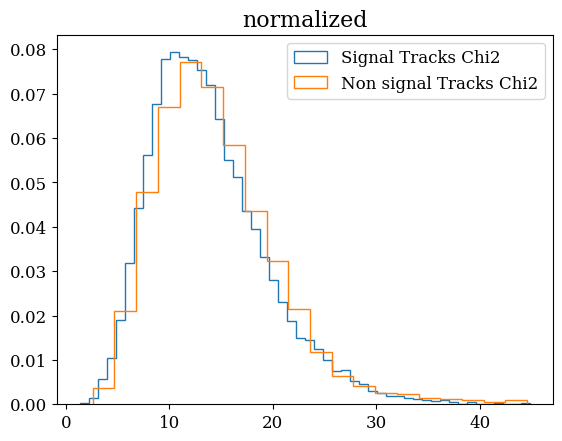

In [35]:
plt.hist(chi2_after_truth_all_steps,bins=50,density = True,histtype='step',label  ='Signal Tracks Chi2')
plt.hist(chi2_after_false_all_steps,bins=20,density = True,histtype='step',label = 'Non signal Tracks Chi2')
##parallel y axis line at x = 1
plt.legend()
plt.title('normalized')
plt.show()